<a href="https://colab.research.google.com/github/Inkyungkimm/DataSets/blob/main/Frog_and_tail_InKyung%20Kim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How can frog grow its tail back?


## Data accession

Load data from the link directly or load it through Courseworks .zip file.

In [1]:
!wget https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip -O /content/frogtail.zip

--2025-02-19 19:23:59--  https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94419121 (90M) [application/zip]
Saving to: ‘/content/frogtail.zip’

/content/frogtail.z 100%[===================>]  90.04M  21.7MB/s    in 4.9s    

2025-02-19 19:24:05 (18.5 MB/s) - ‘/content/frogtail.zip’ saved [94419121/94419121]



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
import os

zip_file = "/content/drive/MyDrive/TA/Frogtail_files/ArrayExpressV2.zip" # replace path to your zip file's path
extract_dir = "/content/drive/MyDrive/TA/Frogtail_files/" # where zip file is going to be extracted to

os.makedirs(extract_dir, exist_ok=True) # create the extraction directory if it doesn't exist

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/drive/MyDrive/TA/Frogtail_files/


In [4]:
zip_file = extract_dir+"ArrayExpressV2.zip" # file is a nested zip, dezip again

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/drive/MyDrive/TA/Frogtail_files/


## Make an anndata matrix using scanpy or anndata

Usually single cell data is either directly stored in highdimensional files with .h5 extensions or in compressed count matrices with several tsv/csv/json logging the covariates information. Here is an example of how to compress and download this data into an anndata object that facilitates downstream single cell analysis.

- AnnData object for single cell data:  [Documentation](https://https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html)
- Scanpy for single cell analysis: [Documentation](https://scanpy.readthedocs.io/en/stable/index.html)



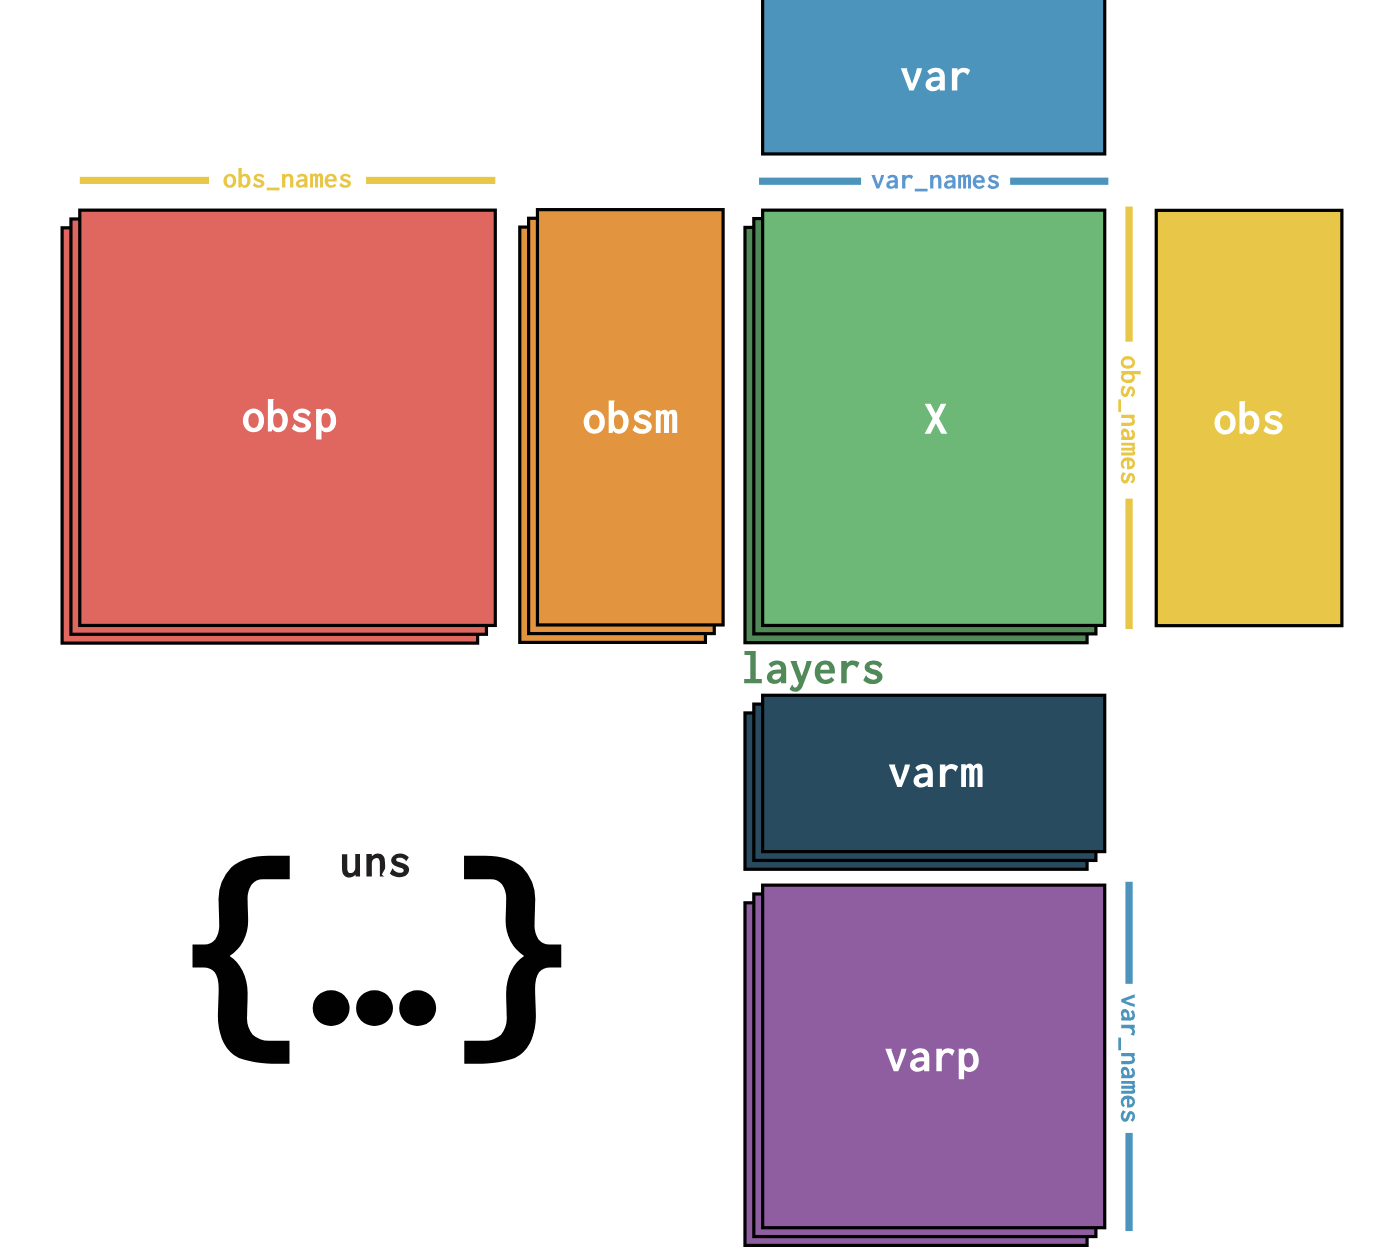

In [5]:
!pip install anndata
!pip install scanpy

In [6]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
from scipy.io import mmread


X = mmread(extract_dir+'ArrayExpress/countsMatrix.mtx') # compressed sparse matrix of gene expression
genes = pd.read_csv(extract_dir+'ArrayExpress/genes.csv', sep=' ', header=None) # col names of genes
cells = pd.read_csv(extract_dir+'ArrayExpress/cells.csv', sep=' ', header=None) # row names of cells
labels = pd.read_csv(extract_dir+'ArrayExpress/labels.csv')
meta = pd.read_csv(extract_dir+'ArrayExpress/meta.csv')


adata = ad.AnnData(X.T)

/usr/local/lib/python3.11/dist-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


In [7]:
cells.columns = ['barcode_cells']
meta_aug = pd.merge(meta, labels, left_on='sample', right_on='Sample', how='left')

In [8]:
adata.var_names = genes[0]
adata.obs = pd.merge(cells, meta_aug, left_on='barcode_cells', right_on='cell')


In [9]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [10]:
adata.var

""
Xelaev18000001m.g
Xelaev18000003m.g
Xelaev18000004m.g
Xelaev18000005m.g
tm6sf2.1
...
loc101731491.S
loc101731436.S
Xetrov90022661m.S
loc398467.S


In [11]:
adata.X = adata.X.tocsr()

In [12]:
adata.write_h5ad(extract_dir+'cleaned_processed_frogtail.h5ad')

## Load data

In [13]:
import anndata as ad
extract_dir = "/content/drive/Shareddrive/STAT5243/Projects/Part 1/Datasets/"
adata = ad.read_h5ad('/content/drive/MyDrive/TA/Frogtail_files/cleaned_processed_frogtail.h5ad') # ad.read_h5ad()

/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [14]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [15]:
adata.obs

,barcode_cells,cell,sample,DevelopmentalStage,DaysPostAmputation,cluster,X,Y,CellCyclePhase,Sample,Lane,Condition,batch
0,AAACCTGAGCTAGTTC.1,AAACCTGAGCTAGTTC.1,SIGAB5,st40,3,Erythrocyte 4,-6.395430,0.832323,G2M,SIGAB5,SLX-15583,ST40_3,3
1,AAACCTGGTGGGTCAA.1,AAACCTGGTGGGTCAA.1,SIGAB5,st40,3,Myeloid 1,-2.428271,13.826715,G1,SIGAB5,SLX-15583,ST40_3,3
2,AAACCTGGTTTGTTGG.1,AAACCTGGTTTGTTGG.1,SIGAB5,st40,3,Beta ionocyte,-1.398049,-14.653897,G1,SIGAB5,SLX-15583,ST40_3,3
3,AAACGGGGTCGGCATC.1,AAACGGGGTCGGCATC.1,SIGAB5,st40,3,Erythrocyte 4,-5.863765,0.489598,G2M,SIGAB5,SLX-15583,ST40_3,3
4,AAACGGGTCCTACAGA.1,AAACGGGTCCTACAGA.1,SIGAB5,st40,3,Goblet cell,2.106444,-6.594430,G1,SIGAB5,SLX-15583,ST40_3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,TTCTTAGAGTACCGGA.1,TTCTTAGAGTACCGGA.1,SIGAB10,st40,3,Erythrocyte 4,-5.879582,0.924197,G2M,SIGAB10,SLX-15739,ST40_3,4
13195,TTGACTTAGAGTAAGG.1,TTGACTTAGAGTAAGG.1,SIGAB10,st40,3,Goblet cell,1.252149,-8.870151,G1,SIGAB10,SLX-15739,ST40_3,4
13196,TTGCGTCTCAAGAAGT.1,TTGCGTCTCAAGAAGT.1,SIGAB10,st40,3,Goblet cell,0.693335,-9.168521,G1,SIGAB10,SLX-15739,ST40_3,4
13197,TTGTAGGCAGTACACT.1,TTGTAGGCAGTACACT.1,SIGAB10,st40,3,Erythrocyte 1,-4.087618,4.145738,G1,SIGAB10,SLX-15739,ST40_3,4


In [16]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [17]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

## Processing data

In [18]:
adata.layers["counts"] = adata.X.copy()

In [19]:
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [20]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.highly_variable_genes(adata, n_top_genes=2300)

In [21]:
adata = adata[:, adata.var.highly_variable]

# Clustering Analysis:

In [22]:
!pip install igraph
!pip install leidenalg

In [80]:

selected_cells = adata.obs[
    (adata.obs["DevelopmentalStage"] == "st40") &
    (adata.obs["DaysPostAmputation"] == 2)
]

# 선택된 세포만으로 새로운 AnnData 객체 생성 (깊은 복사)
adata_selected = adata[selected_cells.index, :].copy()

print(f"Filtered dataset shape: {adata_selected.shape}")
print("Unique clusters in adata_selected:", adata_selected.obs["cluster"].unique())

Filtered dataset shape: (2310, 2300)
Unique clusters in adata_selected: ['Sclerotome', 'Goblet cell', 'Myeloid 1', 'Erythrocyte 1', 'Erythrocyte 3', ..., 'Erythrocyte 2', 'Lymphoid 5 (CD19+)', 'Interneuron 3', 'Lymphoid endothelial cells', 'Small secretory cell']
Length: 45
Categories (45, object): ['Alpha ionocyte', 'Beta ionocyte', 'Dermomyotome',
                          'Differentiating myocyte', ..., 'Syndetome', 'Vascular endothelial cell',
                          'Vulnerable Motor Neuron', 'laminin-rich epidermis']


PCA + Leiden

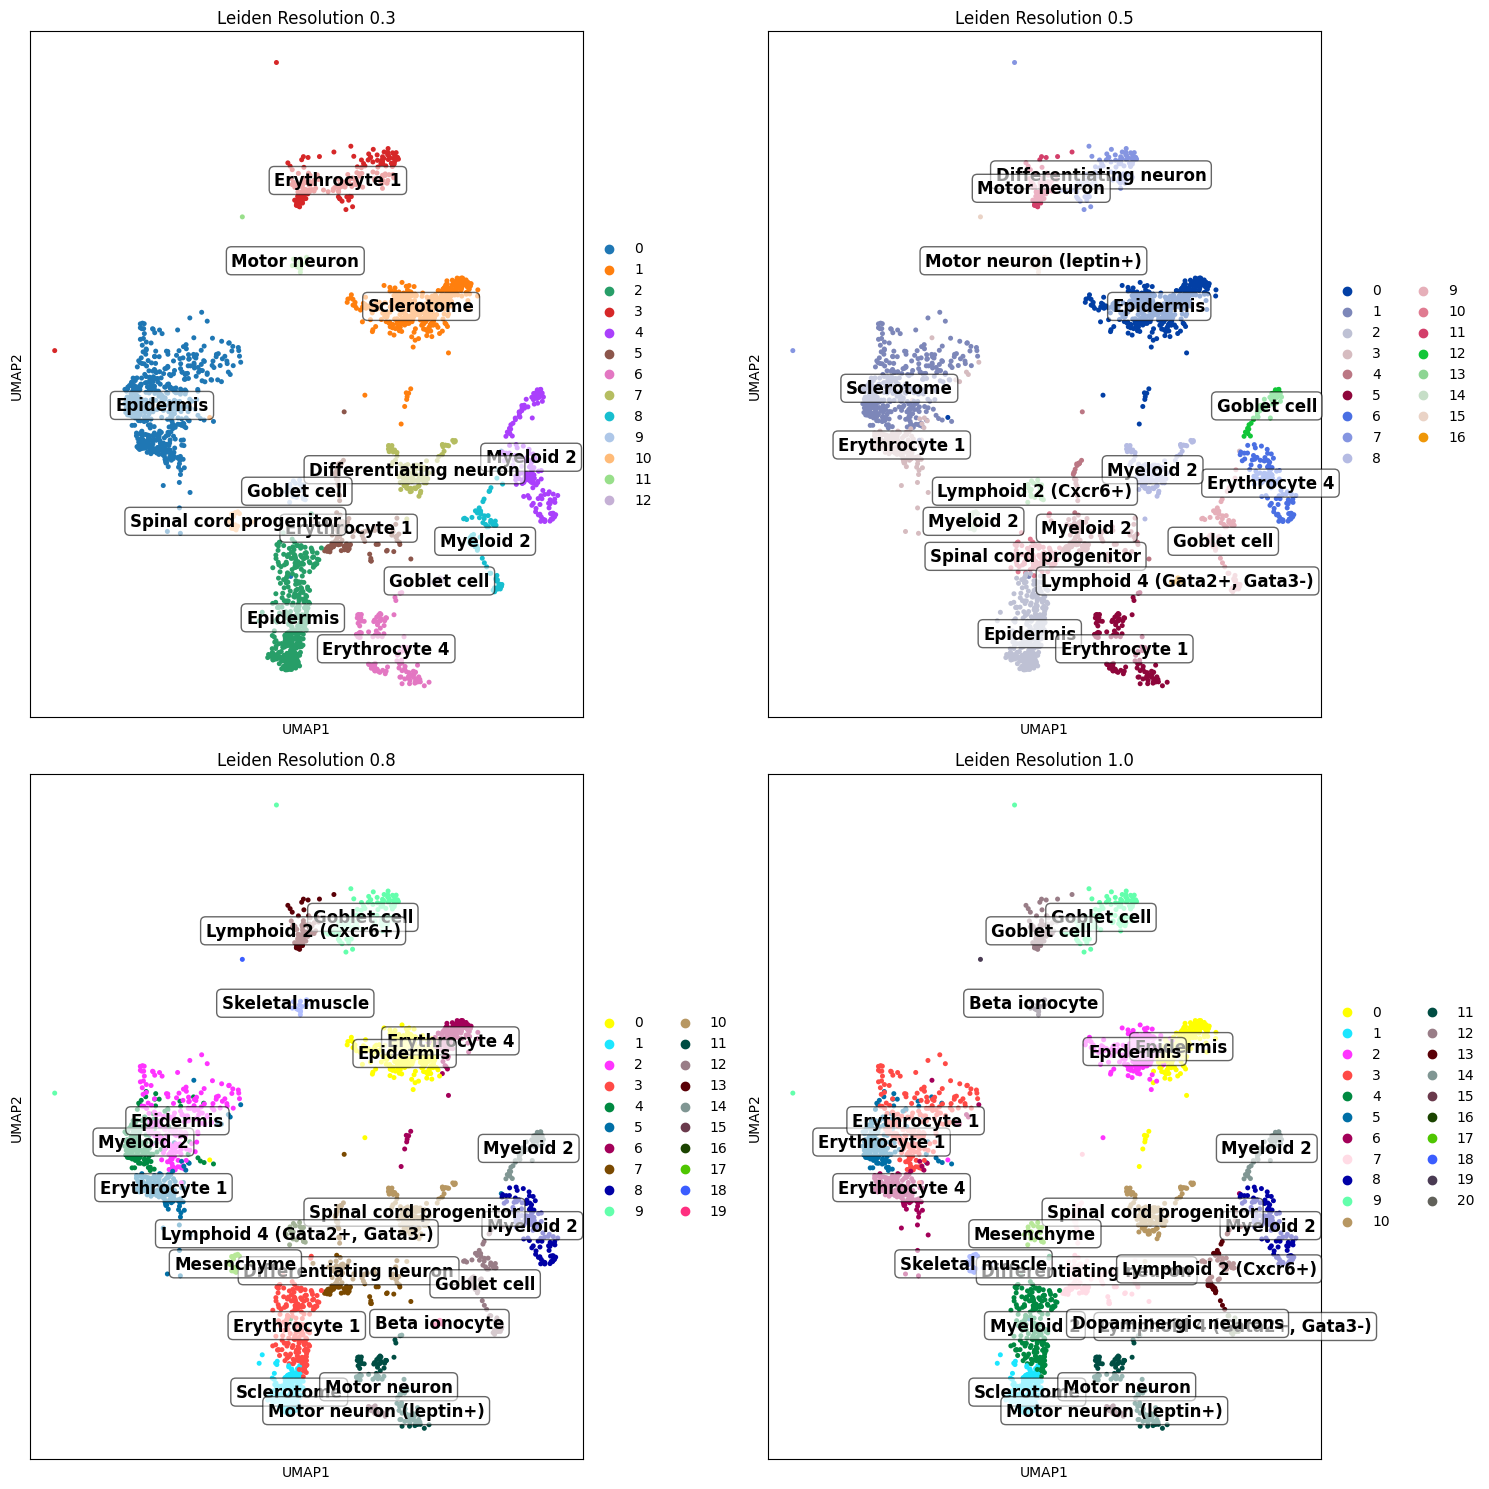


Number of clusters for each resolution:
Resolution 0.3: 13 clusters
Resolution 0.5: 17 clusters
Resolution 0.8: 20 clusters
Resolution 1.0: 21 clusters


In [128]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Perform PCA if not done yet
if "X_pca" not in adata_selected.obsm:
    sc.pp.pca(adata_selected)

# Compute the neighbor graph if not done yet
if "neighbors" not in adata_selected.uns:
    sc.pp.neighbors(adata_selected)

# Perform UMAP if not done yet
if "X_umap" not in adata_selected.obsm:
    sc.tl.umap(adata_selected)

# Perform Leiden clustering with multiple resolutions
resolutions = [0.3, 0.5, 0.8, 1.0]
for res in resolutions:
    sc.tl.leiden(adata_selected, resolution=res, key_added=f'leiden_res{res}')

# Map cluster numbers to meaningful names if available
if "cluster" in adata_selected.obs.columns:
    cluster_mapping = adata_selected.obs.set_index(f'leiden_res{res}')["cluster"].to_dict()
else:
    cluster_mapping = {}  # If no cluster names exist, keep an empty mapping

# Visualize results for each resolution in a 2x2 grid with labels
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

for idx, res in enumerate(resolutions):
    row = idx // 2
    col = idx % 2

    # Plot UMAP
    sc.pl.umap(
        adata_selected, color=f'leiden_res{res}',
        title=f'Leiden Resolution {res}', ax=axes[row, col], show=False
    )

    umap_coords = adata_selected.obsm["X_umap"]
    cluster_labels = adata_selected.obs[f'leiden_res{res}']

    cluster_centers = {}
    for cluster in cluster_labels.unique():
        cluster_points = umap_coords[cluster_labels == cluster]
        cluster_centers[cluster] = cluster_points.mean(axis=0)  # Compute mean coordinates

    for cluster, (x, y) in cluster_centers.items():
        cluster_name = cluster_mapping.get(cluster, str(cluster))  # Use name if available, otherwise keep number
        axes[row, col].text(
            x, y, cluster_name, fontsize=12, weight="bold", ha="center", va="center", color="black",
            bbox=dict(facecolor="white", alpha=0.6, edgecolor="black", boxstyle="round,pad=0.3")
        )

plt.tight_layout()
plt.show()

print("\nNumber of clusters for each resolution:")
for res in resolutions:
    n_clusters = len(adata_selected.obs[f'leiden_res{res}'].unique())
    print(f"Resolution {res}: {n_clusters} clusters")


PCA + Louvain

In [ ]:
!pip install louvain

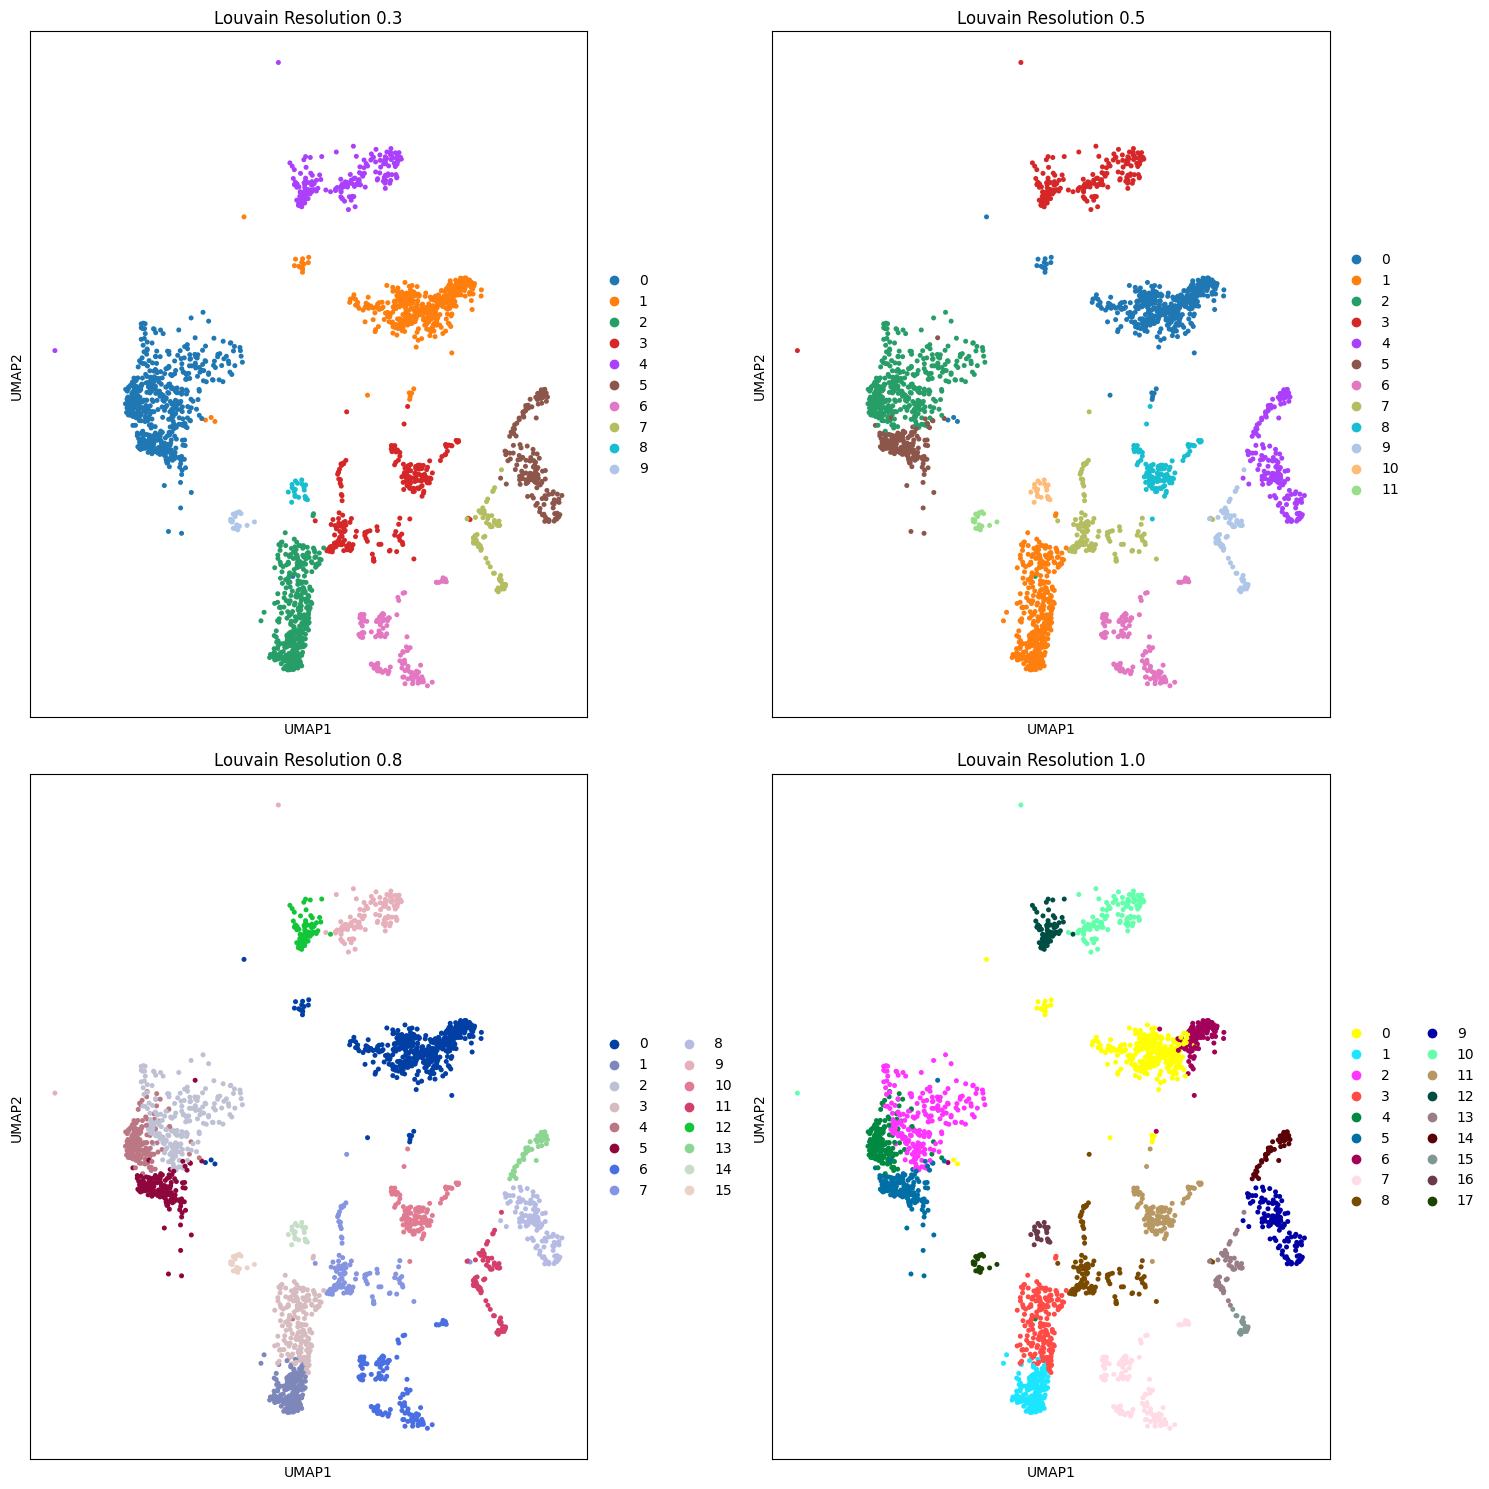


Number of clusters for each resolution:
Resolution 0.3: 10 clusters
Resolution 0.5: 12 clusters
Resolution 0.8: 16 clusters
Resolution 1.0: 18 clusters


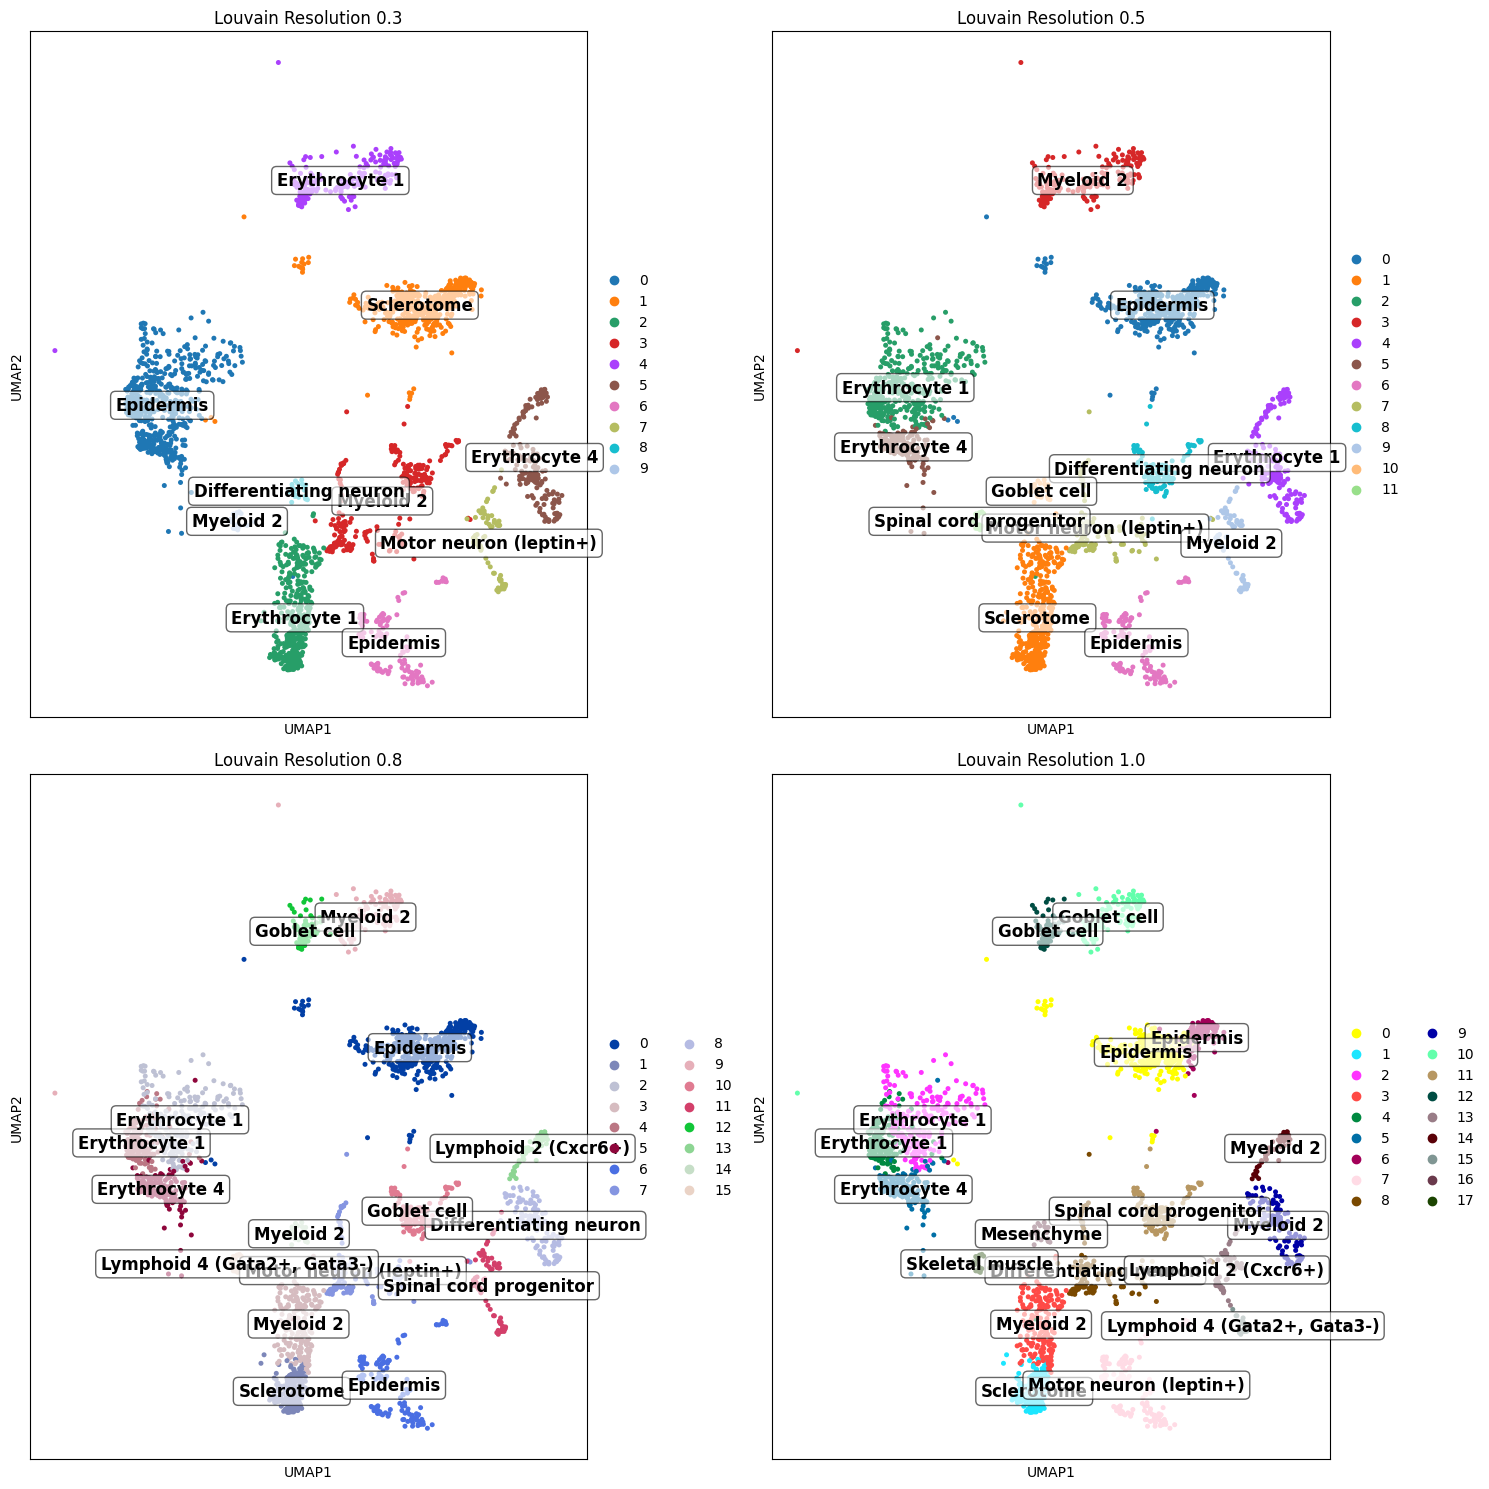


Number of clusters for each resolution:
Resolution 0.3: 10 clusters
Resolution 0.5: 12 clusters
Resolution 0.8: 16 clusters
Resolution 1.0: 18 clusters


In [131]:
if "X_pca" not in adata_selected.obsm:
    sc.pp.pca(adata_selected)

if "neighbors" not in adata_selected.uns:
    sc.pp.neighbors(adata_selected)

if "X_umap" not in adata_selected.obsm:
    sc.tl.umap(adata_selected)

resolutions = [0.3, 0.5, 0.8, 1.0]
for res in resolutions:
    sc.tl.louvain(adata_selected, resolution=res, key_added=f'louvain_res{res}')

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for idx, res in enumerate(resolutions):
    row = idx // 2
    col = idx % 2
    sc.pl.umap(
        adata_selected, color=f'louvain_res{res}',
        title=f'Louvain Resolution {res}', ax=axes[row, col], show=False
    )
plt.tight_layout()
plt.show()

print("\nNumber of clusters for each resolution:")
for res in resolutions:
    n_clusters = len(adata_selected.obs[f'louvain_res{res}'].unique())
    print(f"Resolution {res}: {n_clusters} clusters")

if "cluster" in adata_selected.obs.columns:
    cluster_mapping = adata_selected.obs.set_index(f'louvain_res{res}')["cluster"].to_dict()
else:
    cluster_mapping = {}

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

for idx, res in enumerate(resolutions):
    row = idx // 2
    col = idx % 2

    sc.pl.umap(
        adata_selected, color=f'louvain_res{res}',
        title=f'Louvain Resolution {res}', ax=axes[row, col], show=False
    )

    umap_coords = adata_selected.obsm["X_umap"]
    cluster_labels = adata_selected.obs[f'louvain_res{res}']

    cluster_centers = {}
    for cluster in cluster_labels.unique():
        cluster_points = umap_coords[cluster_labels == cluster]
        cluster_centers[cluster] = cluster_points.mean(axis=0)

    for cluster, (x, y) in cluster_centers.items():
        cluster_name = cluster_mapping.get(cluster, str(cluster))
        axes[row, col].text(
            x, y, cluster_name, fontsize=12, weight="bold", ha="center", va="center", color="black",
            bbox=dict(facecolor="white", alpha=0.6, edgecolor="black", boxstyle="round,pad=0.3")
        )

plt.tight_layout()
plt.show()

print("\nNumber of clusters for each resolution:")
for res in resolutions:
    n_clusters = len(adata_selected.obs[f'louvain_res{res}'].unique())
    print(f"Resolution {res}: {n_clusters} clusters")



In [135]:
!pip install adjustText


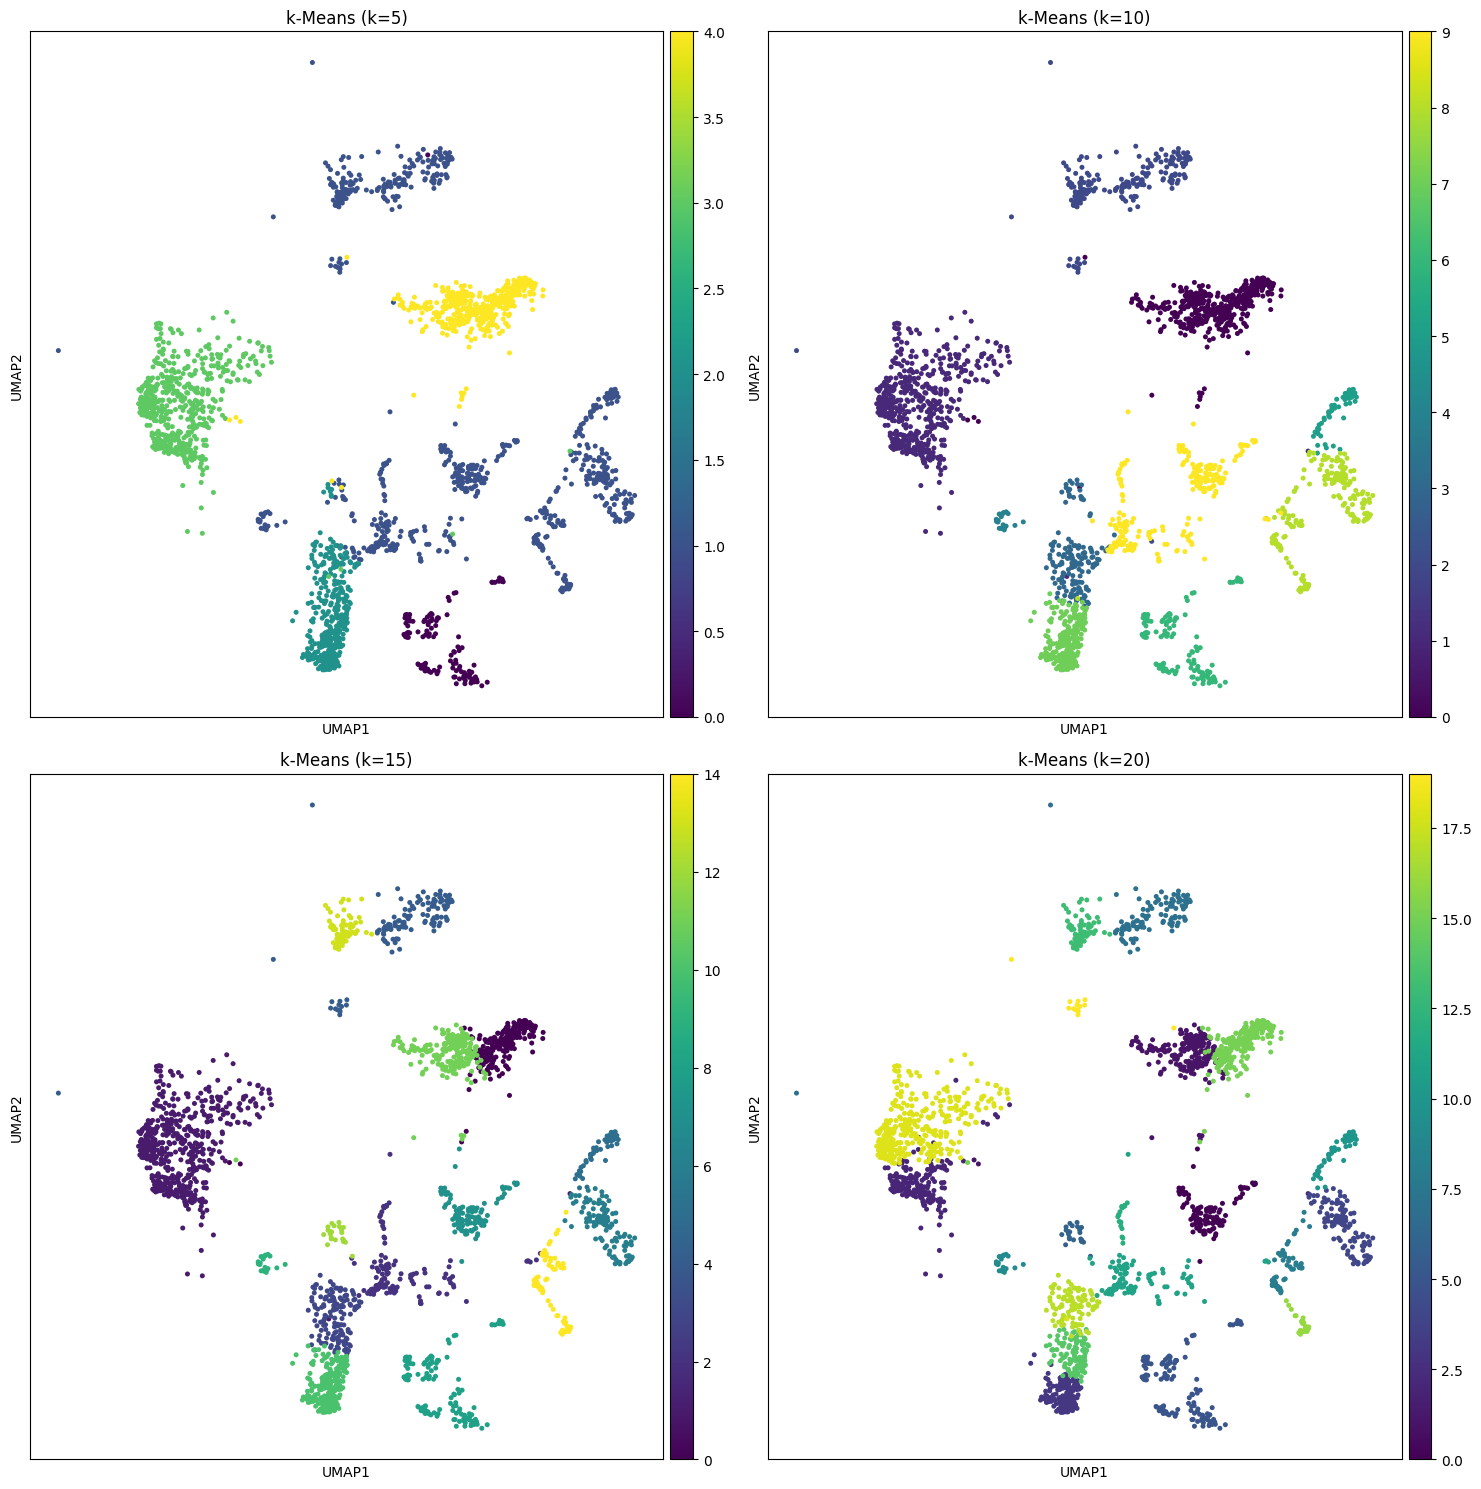

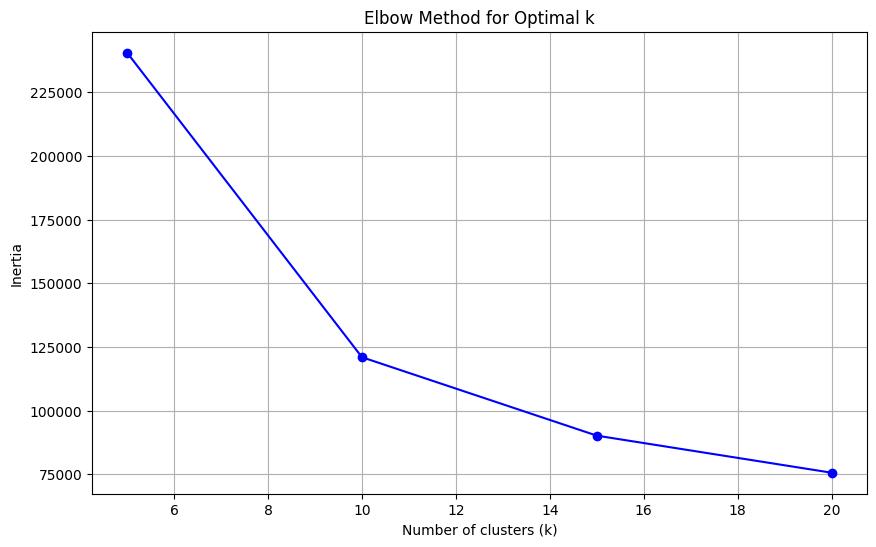

Silhouette Score for k=5: 0.392
Silhouette Score for k=10: 0.476
Silhouette Score for k=15: 0.417
Silhouette Score for k=20: 0.304


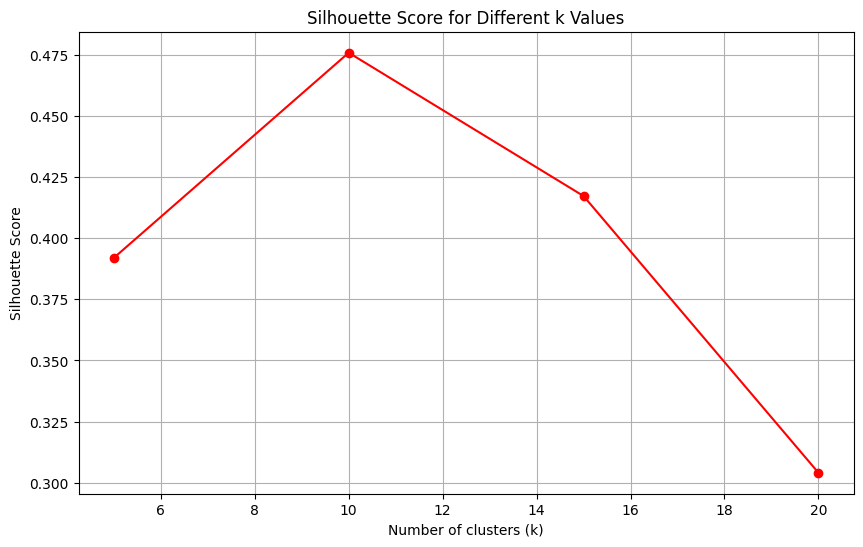

In [132]:
X_pca = adata_selected.obsm["X_pca"]

# Perform K-Means clustering with multiple k values
k_values = [5, 10, 15, 20]
kmeans_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly set n_init to avoid warnings
    adata_selected.obs[f'kmeans_{k}'] = kmeans.fit_predict(X_pca)
    kmeans_results[k] = kmeans.inertia_  # Store inertia

# Visualize results (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for idx, k in enumerate(k_values):
    row = idx // 2
    col = idx % 2
    sc.pl.umap(
        adata_selected, color=f'kmeans_{k}',
        title=f'k-Means (k={k})', ax=axes[row, col], show=False
    )
plt.tight_layout()
plt.show()

# Find the optimal k using the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, [kmeans_results[k] for k in k_values], 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Compute silhouette scores for each k value**
silhouette_scores = {}

for k in k_values:
    score = silhouette_score(X_pca, adata_selected.obs[f'kmeans_{k}'].astype(int))
    silhouette_scores[k] = score
    print(f"Silhouette Score for k={k}: {score:.3f}")

# Visualize silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, [silhouette_scores[k] for k in k_values], 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid(True)
plt.show()


K-Means (k=5): ARI=0.390, Silhouette Score=0.392
K-Means (k=10): ARI=0.593, Silhouette Score=0.476
K-Means (k=15): ARI=0.648, Silhouette Score=0.417
K-Means (k=20): ARI=0.730, Silhouette Score=0.304
Leiden (Resolution=0.3): ARI=0.600, Silhouette Score=0.469
Leiden (Resolution=0.5): ARI=0.710, Silhouette Score=0.370
Leiden (Resolution=0.8): ARI=0.909, Silhouette Score=0.288
Leiden (Resolution=1.0): ARI=0.845, Silhouette Score=0.294
Louvain (Resolution=0.3): ARI=0.599, Silhouette Score=0.477
Louvain (Resolution=0.5): ARI=0.707, Silhouette Score=0.362
Louvain (Resolution=0.8): ARI=0.881, Silhouette Score=0.350
Louvain (Resolution=1.0): ARI=1.000, Silhouette Score=0.285


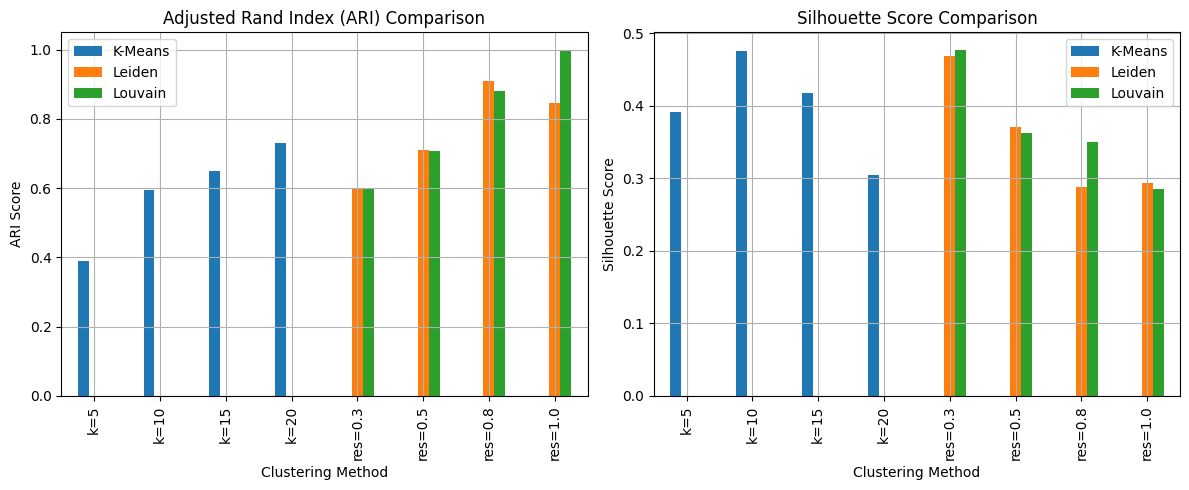

In [88]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

if 'true_labels' in adata_selected.obs:
    true_labels = adata_selected.obs['true_labels']
else:
    print("Warning: 'true_labels' column not found. Using Louvain (res=1.0) as reference labels.")
    true_labels = adata_selected.obs['louvain_res1.0']  # Louvain(1.0)을 기준으로 사용

evaluation_results = {'K-Means': {}, 'Leiden': {}, 'Louvain': {}}

# K-Means
for k in k_values:
    cluster_labels = adata_selected.obs[f'kmeans_{k}']
    ari = adjusted_rand_score(true_labels, cluster_labels)
    silhouette = silhouette_score(X_pca, cluster_labels.astype(int))
    evaluation_results['K-Means'][f'k={k}'] = {'ARI': ari, 'Silhouette': silhouette}
    print(f"K-Means (k={k}): ARI={ari:.3f}, Silhouette Score={silhouette:.3f}")

# Leiden
for res in resolutions:
    cluster_labels = adata_selected.obs[f'leiden_res{res}']
    ari = adjusted_rand_score(true_labels, cluster_labels)
    silhouette = silhouette_score(X_pca, cluster_labels.astype(int))
    evaluation_results['Leiden'][f'res={res}'] = {'ARI': ari, 'Silhouette': silhouette}
    print(f"Leiden (Resolution={res}): ARI={ari:.3f}, Silhouette Score={silhouette:.3f}")

# Louvain
for res in resolutions:
    cluster_labels = adata_selected.obs[f'louvain_res{res}']
    ari = adjusted_rand_score(true_labels, cluster_labels)
    silhouette = silhouette_score(X_pca, cluster_labels.astype(int))
    evaluation_results['Louvain'][f'res={res}'] = {'ARI': ari, 'Silhouette': silhouette}
    print(f"Louvain (Resolution={res}): ARI={ari:.3f}, Silhouette Score={silhouette:.3f}")

df_ari = pd.DataFrame({method: {k: v['ARI'] for k, v in value.items()} for method, value in evaluation_results.items()})
df_silhouette = pd.DataFrame({method: {k: v['Silhouette'] for k, v in value.items()} for method, value in evaluation_results.items()})

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ARI Visualization
df_ari.plot(kind='bar', ax=axes[0])
axes[0].set_title("Adjusted Rand Index (ARI) Comparison")
axes[0].set_xlabel("Clustering Method")
axes[0].set_ylabel("ARI Score")
axes[0].grid(True)

# Silhouette Score Visualization
df_silhouette.plot(kind='bar', ax=axes[1])
axes[1].set_title("Silhouette Score Comparison")
axes[1].set_xlabel("Clustering Method")
axes[1].set_ylabel("Silhouette Score")
axes[1].grid(True)

plt.tight_layout()
plt.show()


# Extra metric
# Calinski-Harabasz Index



K-Means (k=5): CH Index=704.377
K-Means (k=10): CH Index=873.372
K-Means (k=15): CH Index=807.275
K-Means (k=20): CH Index=730.866
Leiden (Resolution=0.3): CH Index=649.231
Leiden (Resolution=0.5): CH Index=710.848
Leiden (Resolution=0.8): CH Index=677.819
Leiden (Resolution=1.0): CH Index=678.781
Louvain (Resolution=0.3): CH Index=743.097
Louvain (Resolution=0.5): CH Index=658.247
Louvain (Resolution=0.8): CH Index=699.918
Louvain (Resolution=1.0): CH Index=681.130


<Figure size 1200x600 with 0 Axes>

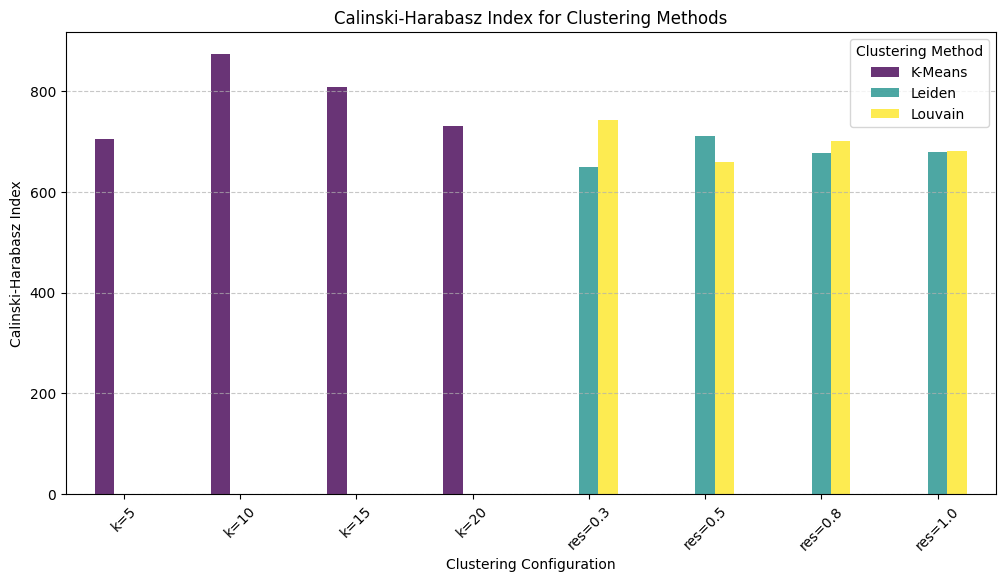

In [89]:
from sklearn.metrics import calinski_harabasz_score

# Dictionary to store
ch_scores = {'K-Means': {}, 'Leiden': {}, 'Louvain': {}}

# Calinski-Harabasz Index for K-means
for k in k_values:
    ch_index = calinski_harabasz_score(X_pca, adata_selected.obs[f'kmeans_{k}'].astype(int))
    ch_scores['K-Means'][f'k={k}'] = ch_index
    print(f"K-Means (k={k}): CH Index={ch_index:.3f}")

# Calinski-Harabasz Index for Leiden Louvain

for res in resolutions:
    ch_index = calinski_harabasz_score(X_pca, adata_selected.obs[f'leiden_res{res}'].astype(int))
    ch_scores['Leiden'][f'res={res}'] = ch_index
    print(f"Leiden (Resolution={res}): CH Index={ch_index:.3f}")

# Calinski-Harabasz Index for Louvain
for res in resolutions:
    ch_index = calinski_harabasz_score(X_pca, adata_selected.obs[f'louvain_res{res}'].astype(int))
    ch_scores['Louvain'][f'res={res}'] = ch_index
    print(f"Louvain (Resolution={res}): CH Index={ch_index:.3f}")

df_ch = pd.DataFrame(ch_scores)

# CH Index Visualization
plt.figure(figsize=(12, 6))
df_ch.plot(kind='bar', figsize=(12, 6), colormap='viridis', alpha=0.8)
plt.title("Calinski-Harabasz Index for Clustering Methods")
plt.xlabel("Clustering Configuration")
plt.ylabel("Calinski-Harabasz Index")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Clustering Method")
plt.xticks(rotation=45)
plt.show()



#Marker Selection and Gene Analysis:




In [102]:
print(adata.obs["cluster"].unique())

['Erythrocyte 4', 'Myeloid 1', 'Beta ionocyte', 'Goblet cell', 'Erythrocyte 1', ..., 'Smooth muscle', 'Syndetome', 'Differentiating myocyte', 'Oligodendrocyte', 'Lymphoid endothelial cells']
Length: 46
Categories (46, object): ['Alpha ionocyte', 'Anterior notochord', 'Beta ionocyte', 'Dermomyotome', ...,
                          'Syndetome', 'Vascular endothelial cell', 'Vulnerable Motor Neuron',
                          'laminin-rich epidermis']


In [103]:
print(adata.obs.groupby("cluster").size())

cluster
Alpha ionocyte                   56
Anterior notochord               34
Beta ionocyte                   207
Dermomyotome                     84
Differentiating myocyte          12
Differentiating neuron          158
Dopaminergic neurons             80
Epidermis                      1800
Erythrocyte 1                  2761
Erythrocyte 2                   132
Erythrocyte 3                   982
Erythrocyte 4                   862
Floor plate                     109
Goblet cell                    1754
Interneuron 1                   128
Interneuron 2                    73
Interneuron 3                    24
Interneuron 4                    23
Lymphoid 1 (Gata2-, Gata3+)      56
Lymphoid 2 (Cxcr6+)              65
Lymphoid 3                       31
Lymphoid 4 (Gata2+, Gata3-)      77
Lymphoid 5 (CD19+)               14
Lymphoid endothelial cells       12
Melanocyte                       25
Melanocyte precursor             21
Melanocyte stem cell             37
Mesenchyme          

<ipython-input-103-37bf387cb3f4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(adata.obs.groupby("cluster").size())


In [91]:
print(f"Selected dataset shape: {adata_selected.shape}")
print("Unique clusters in adata_selected:", adata_selected.obs["cluster"].unique())


Selected dataset shape: (2310, 2300)
Unique clusters in adata_selected: ['Sclerotome', 'Goblet cell', 'Myeloid 1', 'Erythrocyte 1', 'Erythrocyte 3', ..., 'Erythrocyte 2', 'Lymphoid 5 (CD19+)', 'Interneuron 3', 'Lymphoid endothelial cells', 'Small secretory cell']
Length: 45
Categories (45, object): ['Alpha ionocyte', 'Beta ionocyte', 'Dermomyotome',
                          'Differentiating myocyte', ..., 'Syndetome', 'Vascular endothelial cell',
                          'Vulnerable Motor Neuron', 'laminin-rich epidermis']


In [147]:
# Wilcoxon Rank-Sum Test (First Method)
sc.tl.rank_genes_groups(adata_selected, groupby="leiden_res0.5", method="wilcoxon")
# T-test (Second Method)
sc.tl.rank_genes_groups(adata_selected, groupby="leiden_res0.5", method="t-test")



Wilcoxon Rank-Sum (wilcoxon)	Good for datasets with outliers, widely used in bioinformatics.
Logistic Regression (logreg)	Machine learning-based, captures more complex patterns.
T-test (t-test)	Fast and simple, effective for normally distributed data.

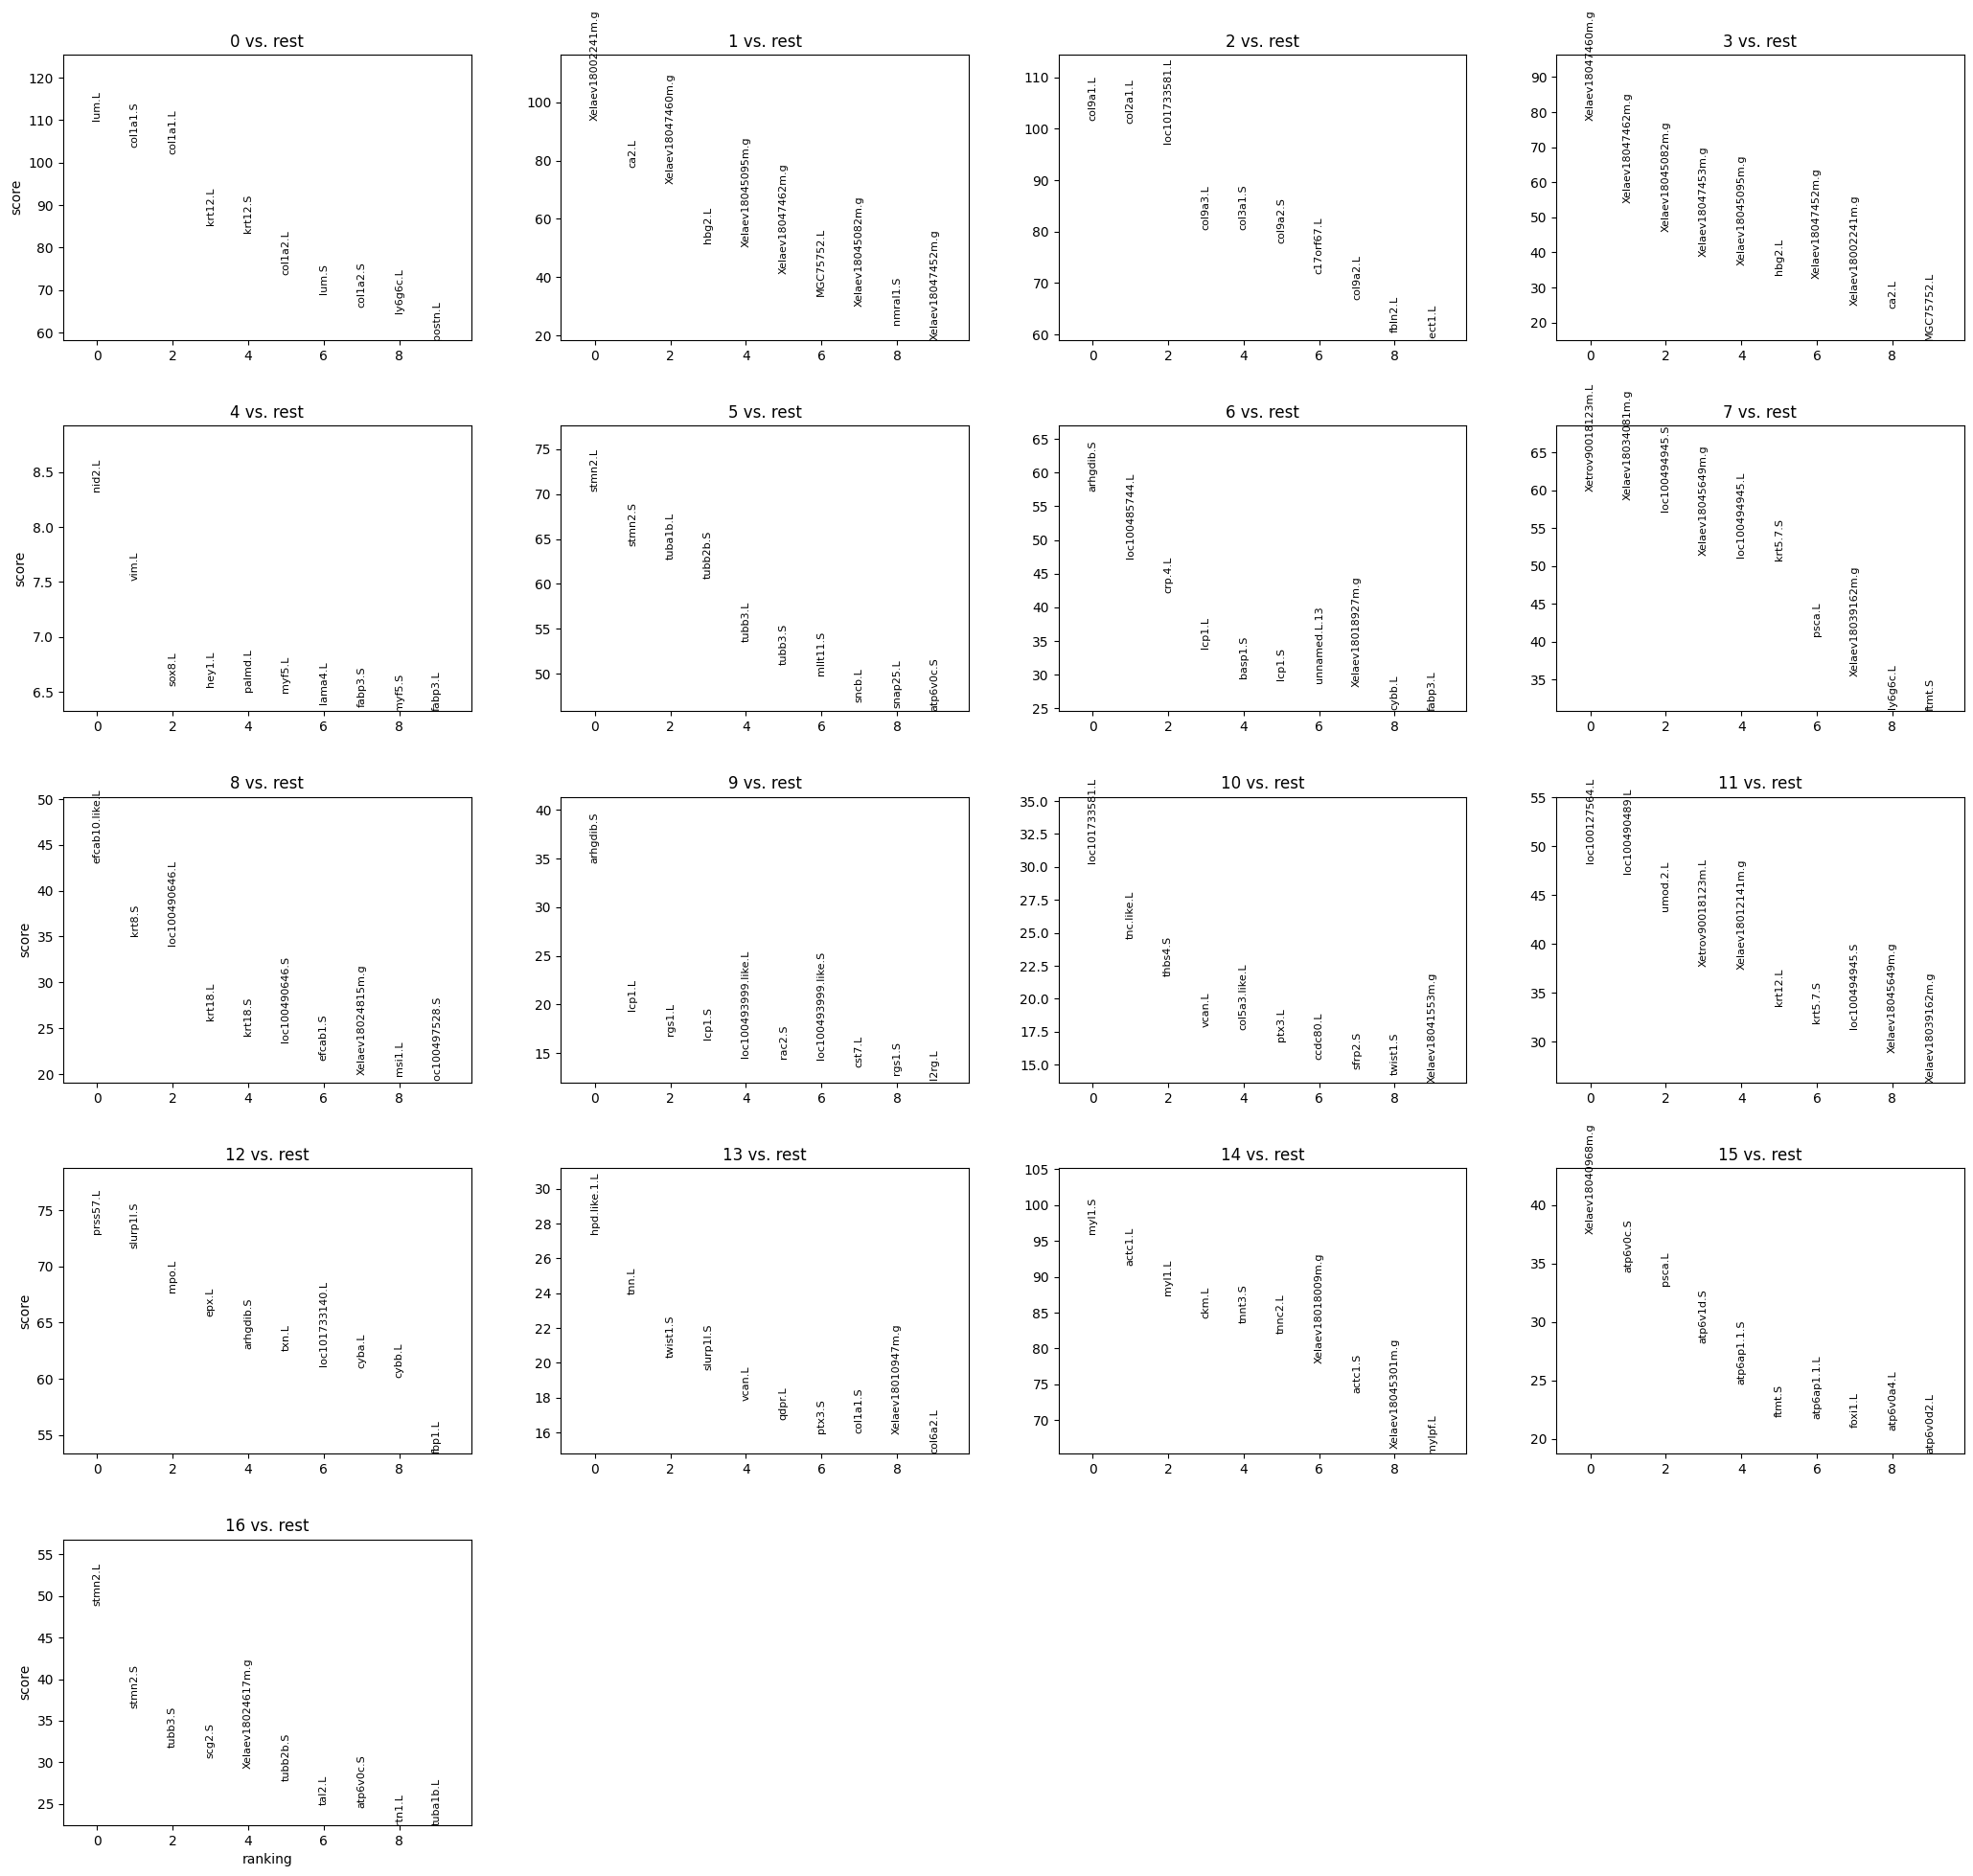

In [148]:
sc.pl.rank_genes_groups(adata_selected, n_genes=10, sharey=False)


In [149]:
import numpy as np

# Extract marker genes from Scanpy results
marker_genes_wilcoxon = adata_selected.uns["rank_genes_groups"]["names"][:20]
marker_genes_ttest = adata_selected.uns["rank_genes_groups"]["names"][:20]

# Convert structured array to a flat list
marker_genes_wilcoxon = [gene for sublist in marker_genes_wilcoxon for gene in sublist]
marker_genes_ttest = [gene for sublist in marker_genes_ttest for gene in sublist]

# Combine into a single set (removes duplicates)
identified_genes = set(marker_genes_wilcoxon + marker_genes_ttest)

# Print the corrected identified marker genes
print("Identified Marker Genes:", identified_genes)



Identified Marker Genes: {'Xelaev18034081m.g', 'eif5b.L', 'Xelaev18035220m.g', 'psap.S', 'tnni2.L', 'loc100494945.S', 'postn.S', 'sla.L', 'atp6v0d2.L', 'gngt1.L', 'krt19.L', 'atp6v1g3.L', 'c1orf158.L', 'myl1.L', 'rtn1.L', 'Xelaev18040854m.g', 'postn.L', 'timp.1.S', 'vcan.L', 'Xelaev18045095m.g', 'pgd.L', 'fabp7.L', 'tubb3.S', 'ftmt.S', 'actc1.S', 'krt8.S', 'loc100493999.like.L', 'col1a2.S', 'Xelaev18018927m.g', 'atp6ap1.1.L', 'twist1.S', 'Xelaev18034078m.g', 'entpd2.L', 'loc101734526.L', 'sfrp2.L', 'gp1bb.S', 's100a11.S', 'slc32a1.S', 'mllt11.S', 'loc101733581.L', 'efcab1.S', 'suclg2.L', 'fbln2.L', 'slc1a3.L', 'sncb.L', 'mall.L', 'rassf2.L', 'fbp1.L', 'loc100049121.S', 'camk1.L', 'tnnc2.L', 'loc101733140.L', 'loc100490646.L', 'ucma.L', 'col4a1.S', 'fos.S', 'stmn2.L', 'actg1.S', 'lcp1.S', 'rgs1.S', 'loc101733516.like.L', 'aldoc.L', 'tuba1b.L', 'elk3.L', 'unnamed.L.13', 'ptx3.L', 'krt18.S', 'myf5.L', 'Xelaev18010947m.g', 'lta4h.L', 'msmb.3.L', 'c17orf58.L', 'Xelaev18016080m.g', 'col11a2p

In [150]:
sheet_name = "ROC markers"
file_path = '/content/aav9996_tables3 (1).xlsx'
roc_marker_df = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure that column is correctly selected
roc_marker_genes = set(roc_marker_df.iloc[:, 0].dropna().astype(str))
identified_genes = set(map(str, identified_genes))  # Convert to string to avoid mismatches

# Compare
shared_genes = identified_genes.intersection(roc_marker_genes)
unique_genes_identified = identified_genes - roc_marker_genes
unique_genes_roc = roc_marker_genes - identified_genes

print(f"Matched genes: {shared_genes}")
print(f"New potential markers: {unique_genes_identified}")
print(f"Missed genes from Table 3: {unique_genes_roc}")


Matched genes: set()
New potential markers: {'Xelaev18035220m.g', 'postn.S', 'atp6v0d2.L', 'gngt1.L', 'krt19.L', 'c1orf158.L', 'vcan.L', 'pgd.L', 'ftmt.S', 'loc100493999.like.L', 'col1a2.S', 'Xelaev18018927m.g', 'atp6ap1.1.L', 'twist1.S', 'loc101734526.L', 'sfrp2.L', 'slc32a1.S', 'sncb.L', 'fbp1.L', 'tnnc2.L', 'loc101733140.L', 'loc100490646.L', 'ucma.L', 'col4a1.S', 'fos.S', 'stmn2.L', 'actg1.S', 'lcp1.S', 'rgs1.S', 'loc101733516.like.L', 'unnamed.L.13', 'ptx3.L', 'myf5.L', 'msmb.3.L', 'Xelaev18016080m.g', 'col11a2p1.S', 'col9a1.L', 'msi1.L', 'cttn.like.1.L', 'loc100127564.L', 'Xetrov90018123m.L', 'Xelaev18018009m.g', 'cdh15.L', 'upk1b.S', 'Xelaev18045082m.g', 'Xelaev18047608m.g', 'dpysl3.L', 'fah.L', 'lum.L', 'ly6g6c.L', 'col9a2.S', 'loc100497528.S', 'txn.L', 'col6a2.L', 'krt18.L', 'cyba.L', 'loc100485744.L', 'prss57.L', 'atp1b3.S', 'thbs4.S', 'Xelaev18047452m.g', 'hey1.L', 'efemp2.L', 'sfrp2.S', 'colec12.S', 'col1a1.L', 'sox8.L', 'krt12.S', 'Xelaev18045649m.g', 'tnnc2.S', 'col5a3.li

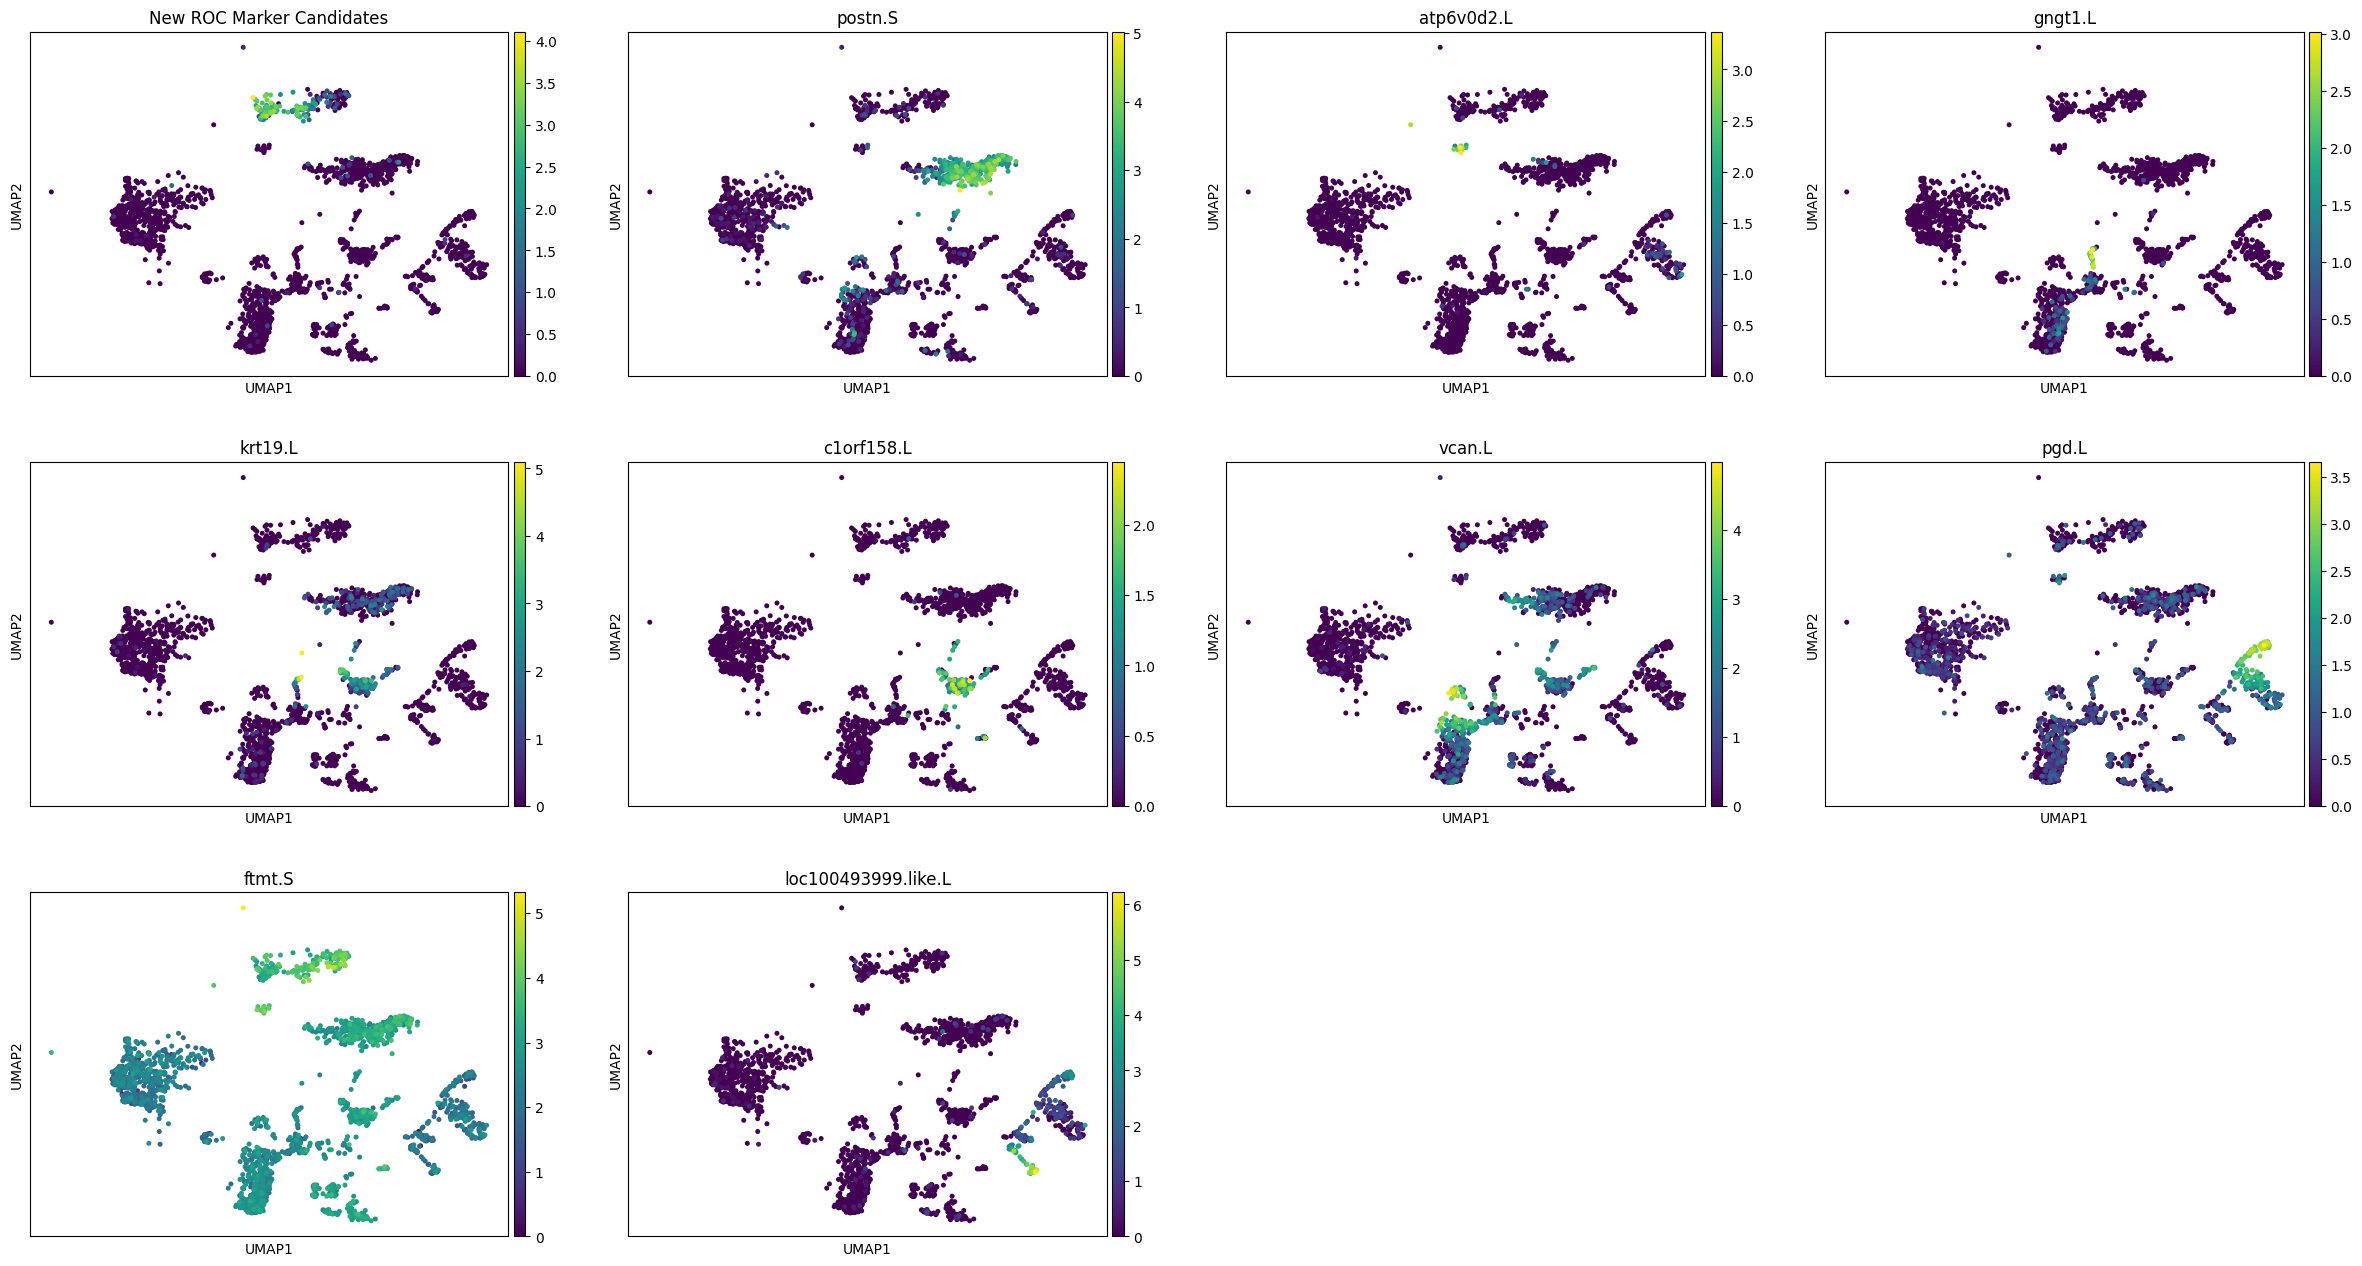

In [151]:
new_marker_candidates = list(unique_genes_identified)[:10]  # Top 10

sc.pl.umap(adata_selected, color=new_marker_candidates, title="New ROC Marker Candidates")


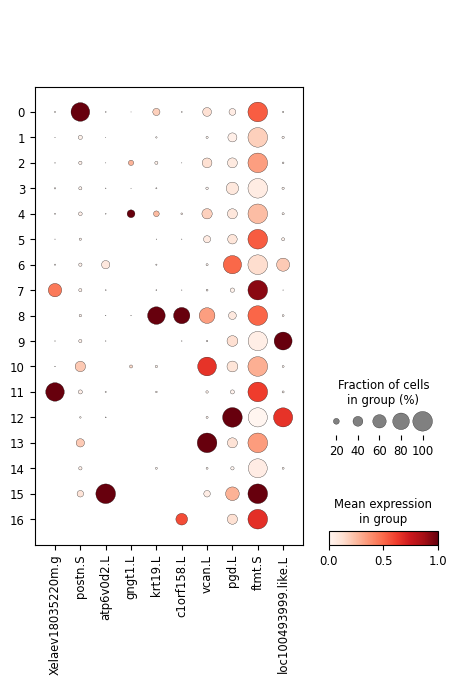

In [152]:
sc.pl.dotplot(adata_selected, var_names=new_marker_candidates, groupby="leiden_res0.5", standard_scale='var')


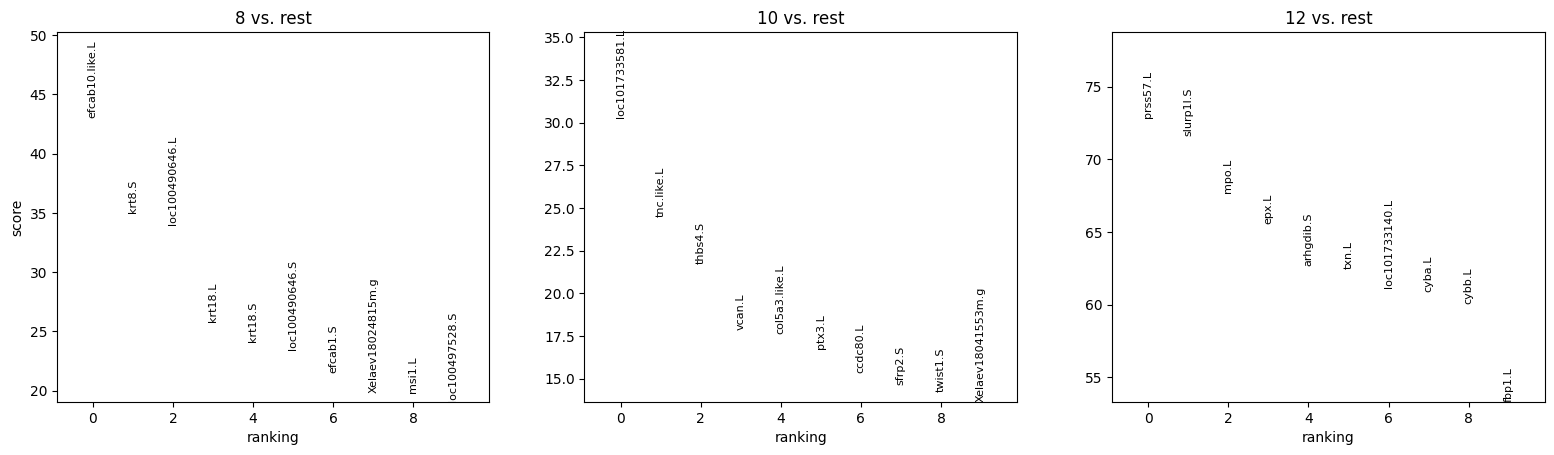

In [153]:
roc_clusters = ["8", "10", "12"]
sc.pl.rank_genes_groups(adata_selected, groups=roc_clusters, n_genes=10, sharey=False)


In [154]:
roc_markers = ["postn.S", "krt19.L", "vcan.L", "pgd.L", "ftmt.S"]

print("\n Kruskal-Wallis Test Results:")
for gene in roc_markers:
    groups = [adata_selected.to_df()[gene][adata_selected.obs["leiden_res0.5"] == cluster] for cluster in adata_selected.obs["leiden_res0.5"].unique()]
    stat, p = kruskal(*groups)
    print(f"{gene}: H-statistic={stat:.2f}, p-value={p:.4e}")


🔍 Kruskal-Wallis Test Results:
postn.S: H-statistic=1537.66, p-value=0.0000e+00
krt19.L: H-statistic=803.90, p-value=9.3045e-161
vcan.L: H-statistic=837.48, p-value=6.3356e-168
pgd.L: H-statistic=597.58, p-value=7.4589e-117
ftmt.S: H-statistic=1384.17, p-value=4.1105e-285


<ipython-input-155-85da13ff5822>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_avg_expression = adata_selected.to_df()[["postn.S", "krt19.L", "vcan.L", "pgd.L", "ftmt.S"]].groupby(adata_selected.obs["leiden_res0.5"]).mean()


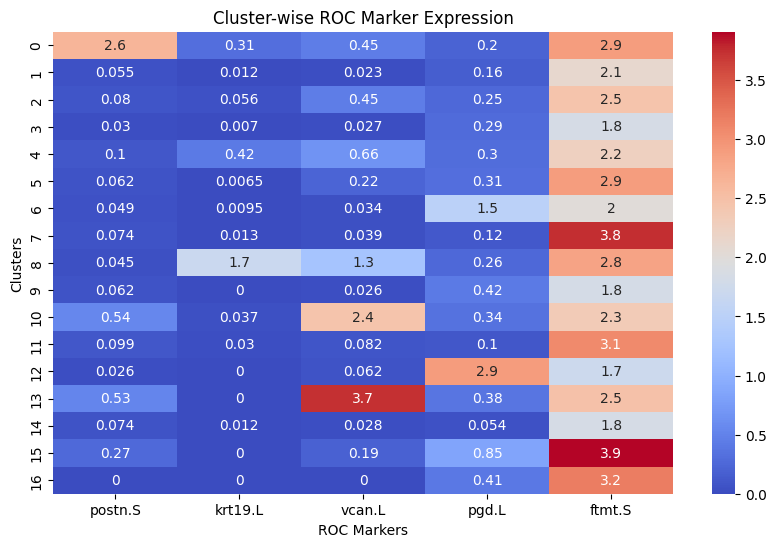

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculation of the average
cluster_avg_expression = adata_selected.to_df()[["postn.S", "krt19.L", "vcan.L", "pgd.L", "ftmt.S"]].groupby(adata_selected.obs["leiden_res0.5"]).mean()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_avg_expression, cmap="coolwarm", annot=True)
plt.title("Cluster-wise ROC Marker Expression")
plt.xlabel("ROC Markers")
plt.ylabel("Clusters")
plt.show()
